In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
housing = pd.read_csv("HousingFinal.csv")

In [147]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        545 non-null    int64  
 1   price             545 non-null    int64  
 2   area              545 non-null    int64  
 3   bedrooms          545 non-null    int64  
 4   bathrooms         545 non-null    int64  
 5   stories           545 non-null    int64  
 6   mainroad          545 non-null    object 
 7   guestroom         545 non-null    object 
 8   basement          545 non-null    object 
 9   hotwaterheating   545 non-null    object 
 10  airconditioning   545 non-null    object 
 11  parking           545 non-null    int64  
 12  prefarea          545 non-null    object 
 13  furnishingstatus  545 non-null    object 
 14  price_k           545 non-null    float64
 15  price_level       545 non-null    int64  
dtypes: float64(1), int64(8), object(7)
memory us

In [148]:
cat_feats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [149]:
final_data = pd.get_dummies(housing, columns = cat_feats, drop_first=True, dtype=int)

In [150]:
final_data.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking,price_k,price_level,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,13300000,7420,4,2,3,2,13300.0,4,1,0,0,0,1,1,0,0
1,2,12250000,8960,4,4,4,3,12250.0,4,1,0,0,0,1,0,0,0
2,3,12250000,9960,3,2,2,2,12250.0,4,1,0,1,0,0,1,1,0
3,4,12215000,7500,4,2,2,3,12215.0,4,1,0,1,0,1,1,0,0
4,5,11410000,7420,4,1,2,2,11410.0,4,1,1,1,0,1,0,0,0


In [151]:
final_data = final_data.drop(['price', 'price_k'], axis=1)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X = final_data.drop('price_level',axis=1)
y = final_data['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dtree = DecisionTreeClassifier()

In [156]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
predictions = dtree.predict(X_test)

In [158]:
from sklearn.metrics import classification_report,confusion_matrix

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        25

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



In [160]:
print(confusion_matrix(y_test,predictions))

[[26  0  0  0]
 [ 0 37  0  0]
 [ 0  0 21  0]
 [ 0  0  0 25]]


[Text(0.3333333333333333, 0.875, 'x[0] <= 136.5\ngini = 0.75\nsamples = 436\nvalue = [111, 101, 113, 111]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 111\nvalue = [0, 0, 0, 111]'),
 Text(0.5, 0.625, 'x[0] <= 270.5\ngini = 0.666\nsamples = 325\nvalue = [111, 101, 113, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 113\nvalue = [0, 0, 113, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 408.5\ngini = 0.499\nsamples = 212\nvalue = [111, 101, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 101\nvalue = [0, 101, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 111\nvalue = [111, 0, 0, 0]')]

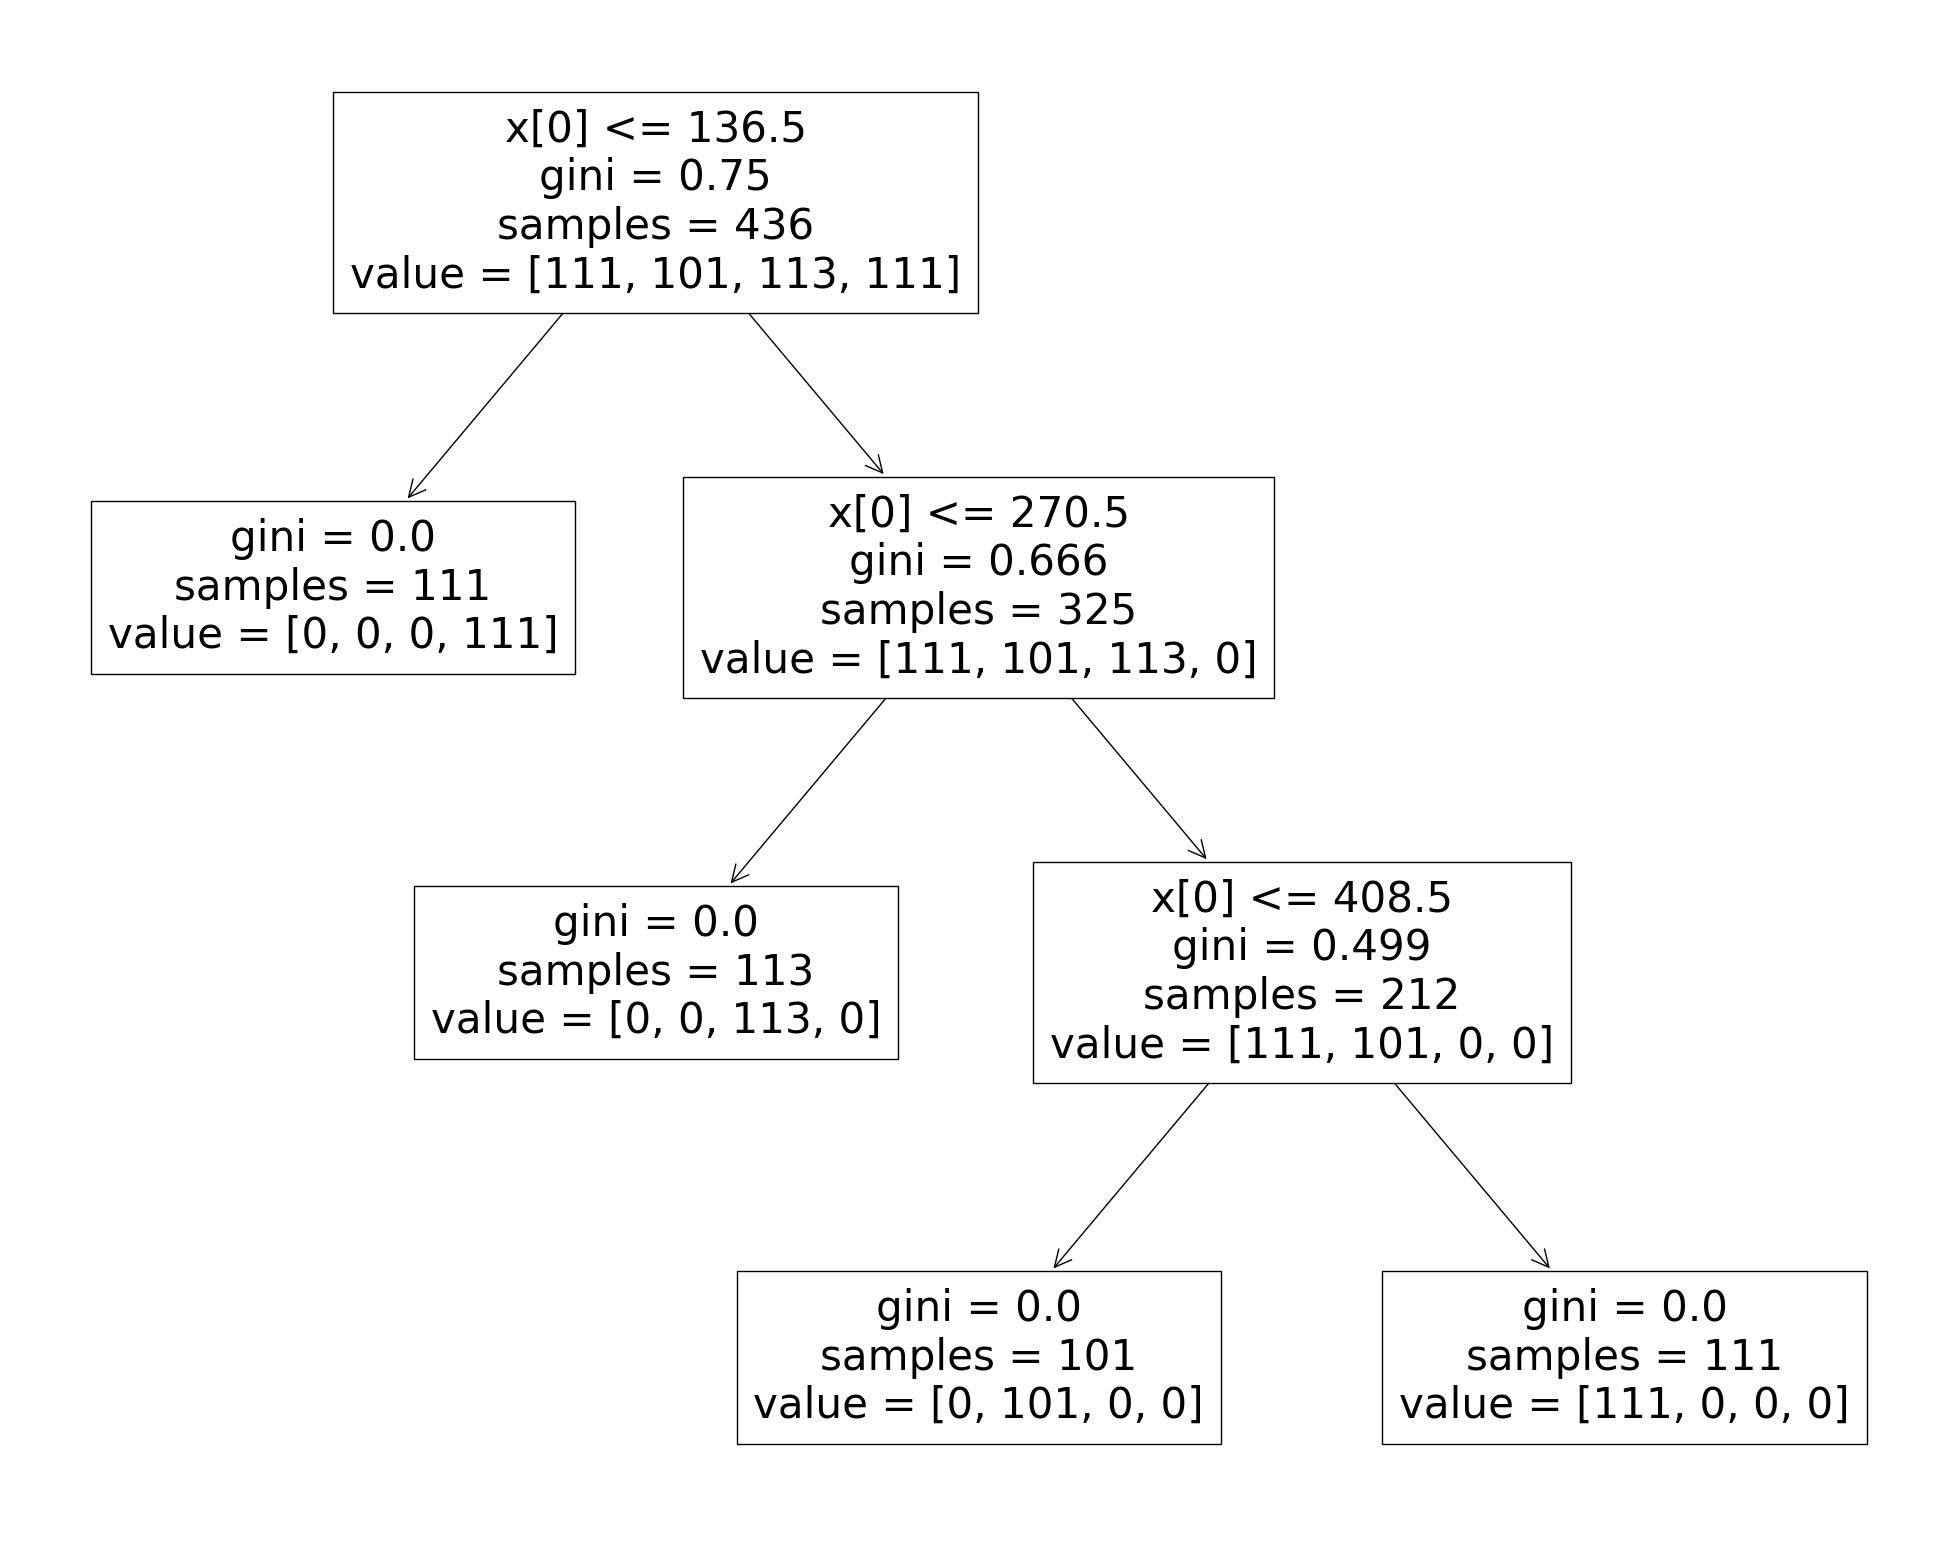

In [161]:
from matplotlib import pyplot as plt
import sklearn.tree
fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(dtree)

# K-Means Clusters next!!

In [162]:
import sys
print(sys.executable)
import platform
print(platform.python_version())

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\ProgramData\anaconda3\python.exe
3.11.5


C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\3891657030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data[final_data.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\3891657030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

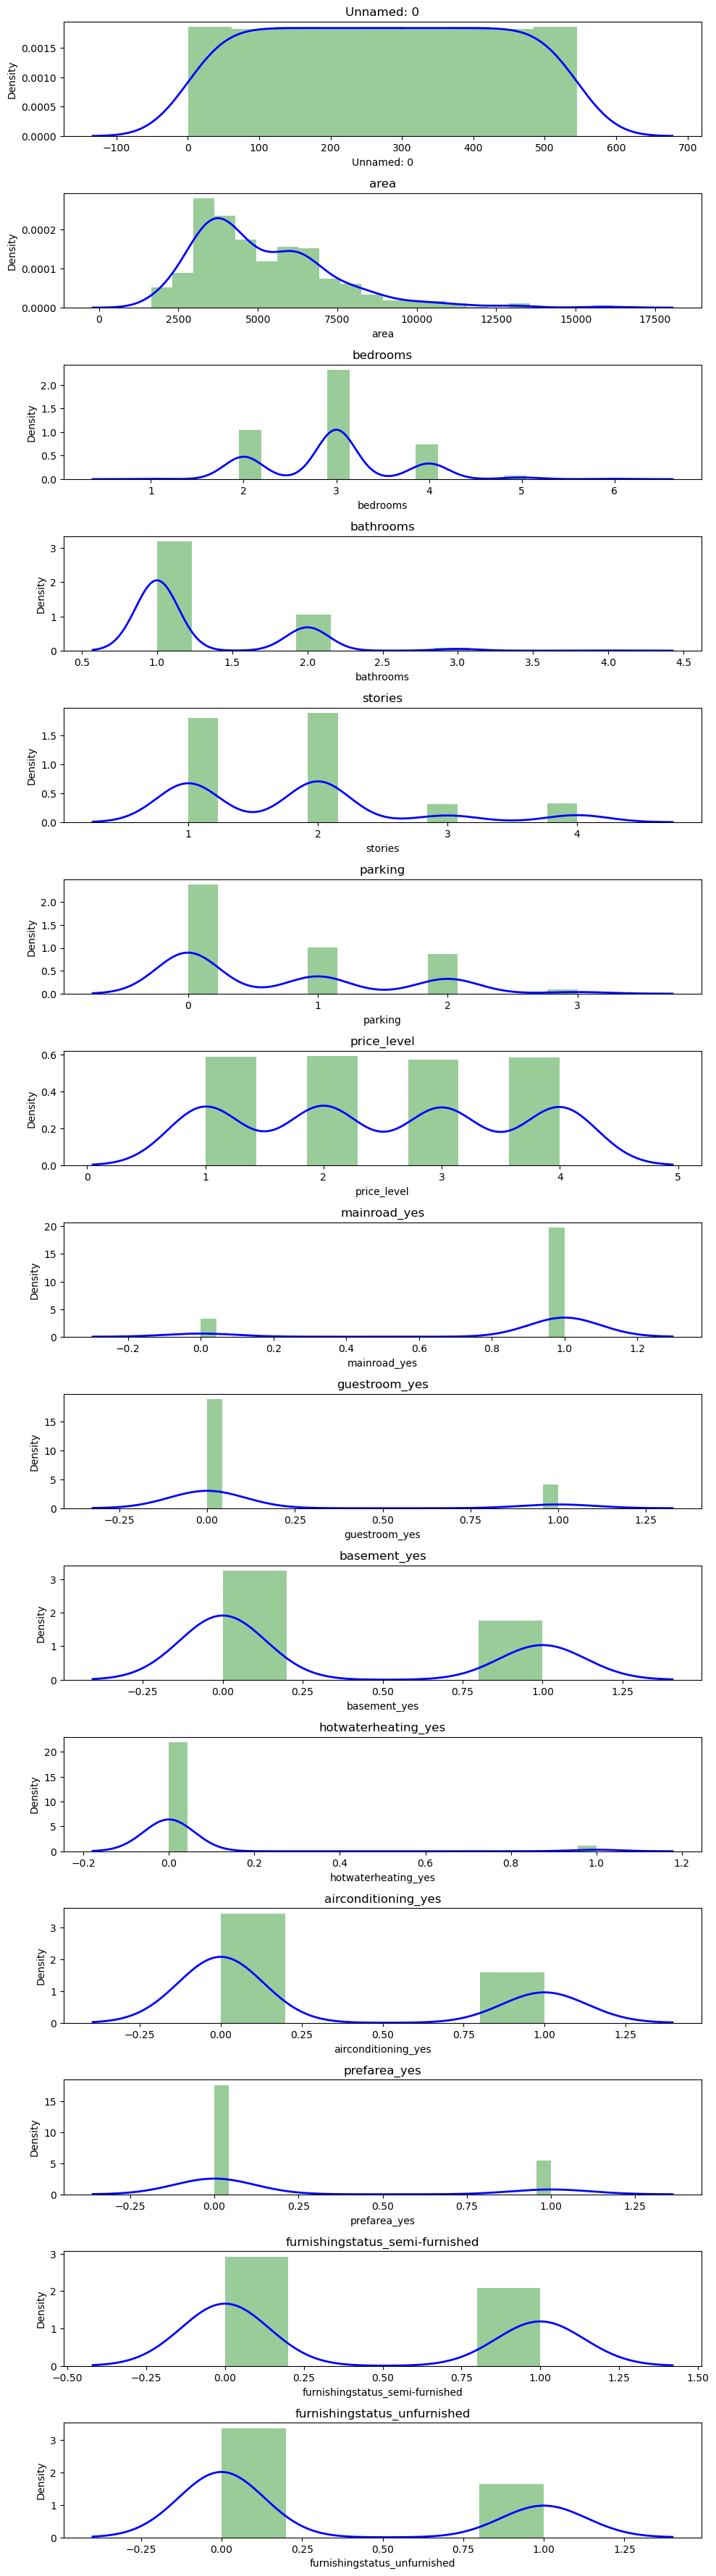

In [163]:
plt.figure(figsize = (10, 40))
for i in range(len(final_data.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(final_data[final_data.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(final_data.columns[i])

plt.tight_layout()

In [164]:
scaler = StandardScaler()
final_data_scaled = scaler.fit_transform(final_data)

score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final_data_scaled)
    score_1.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

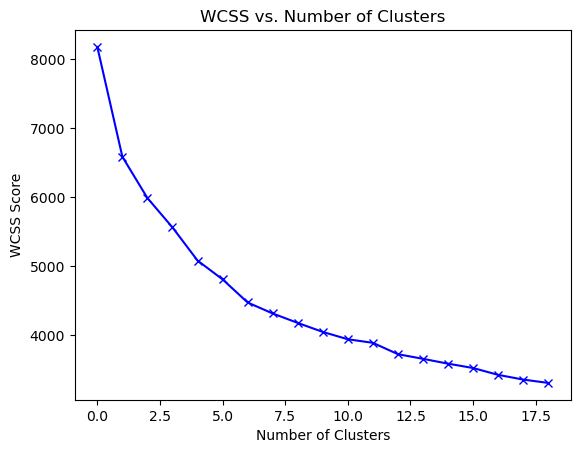

In [165]:
plt.plot(score_1, 'bx-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()

In [177]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(final_data_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [178]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [179]:
final_data_cluster = pd.concat([final_data, pd.DataFrame({'cluster': labels})], axis = 1)

In [180]:
final_data_cluster.head()

,Unnamed: 0,area,bedrooms,bathrooms,stories,parking,price_level,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,cluster
0,1,7420,4,2,3,2,4,1,0,0,0,1,1,0,0,2
1,2,8960,4,4,4,3,4,1,0,0,0,1,0,0,0,2
2,3,9960,3,2,2,2,4,1,0,1,0,0,1,1,0,2
3,4,7500,4,2,2,3,4,1,0,1,0,1,1,0,0,2
4,5,7420,4,1,2,2,4,1,1,1,0,1,0,0,0,2


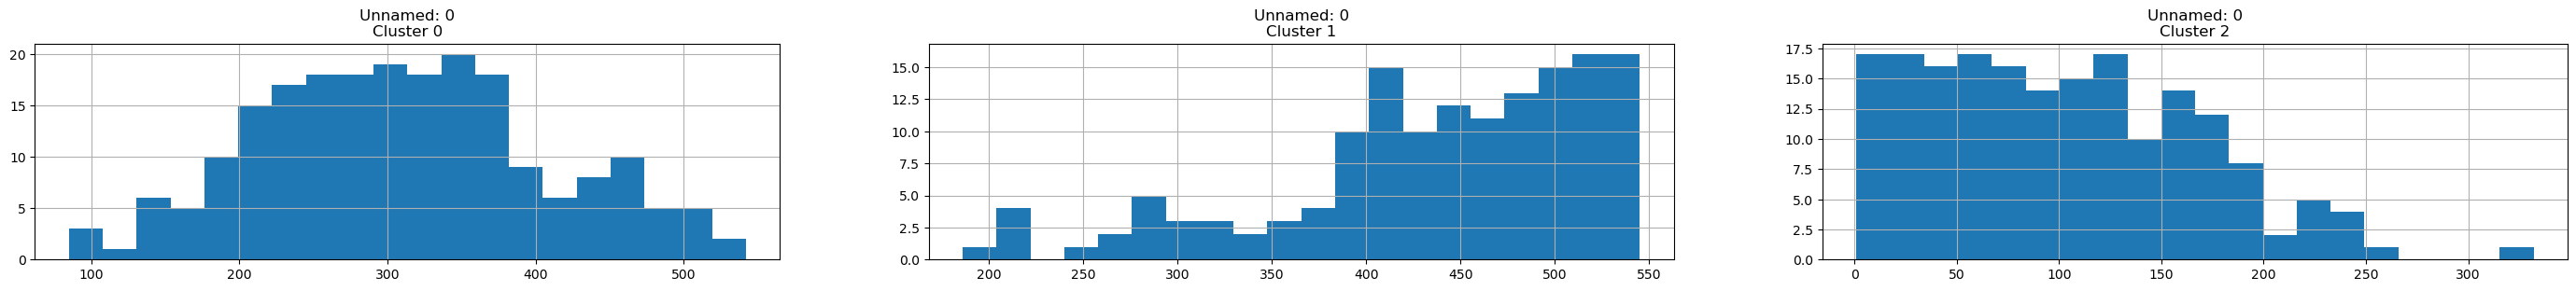

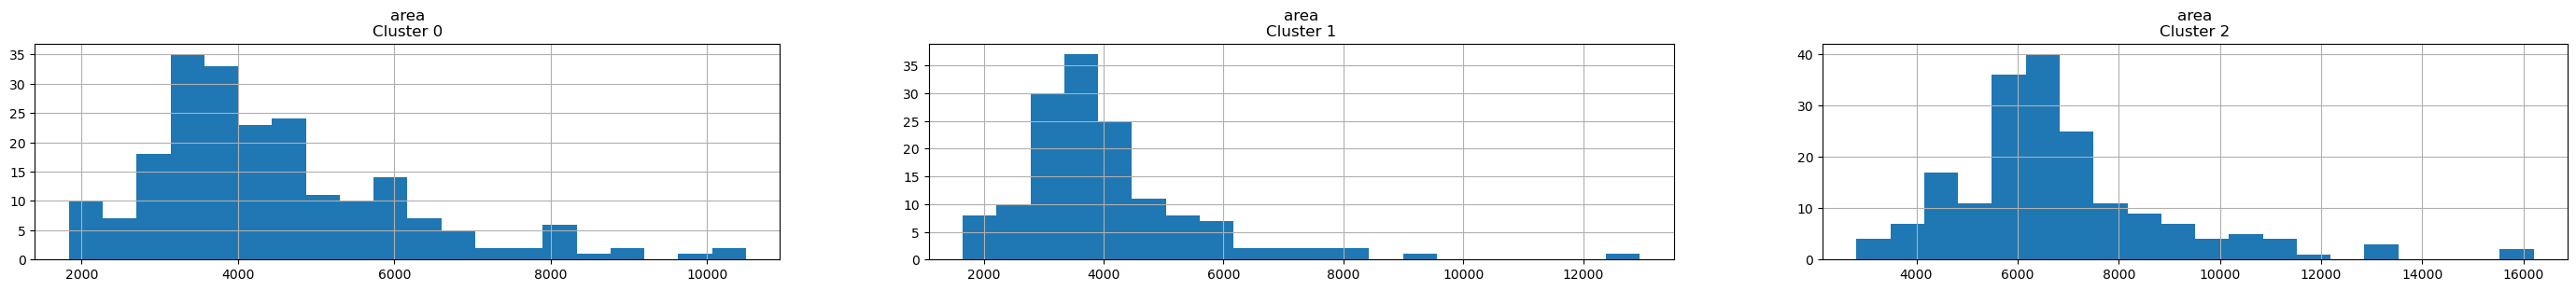

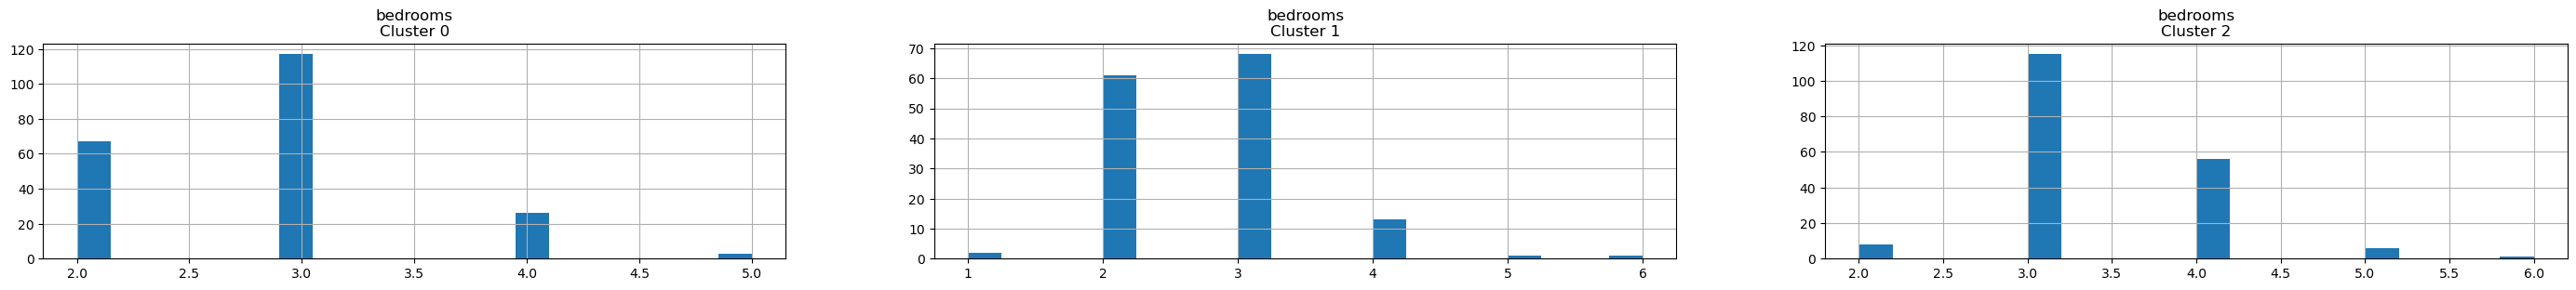

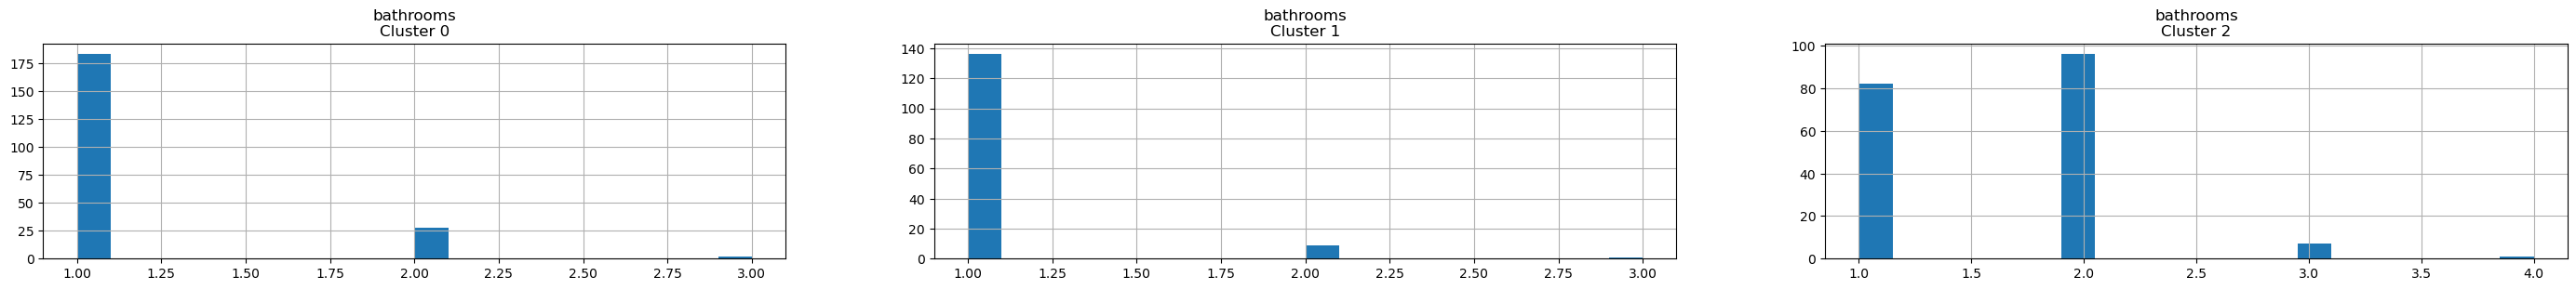

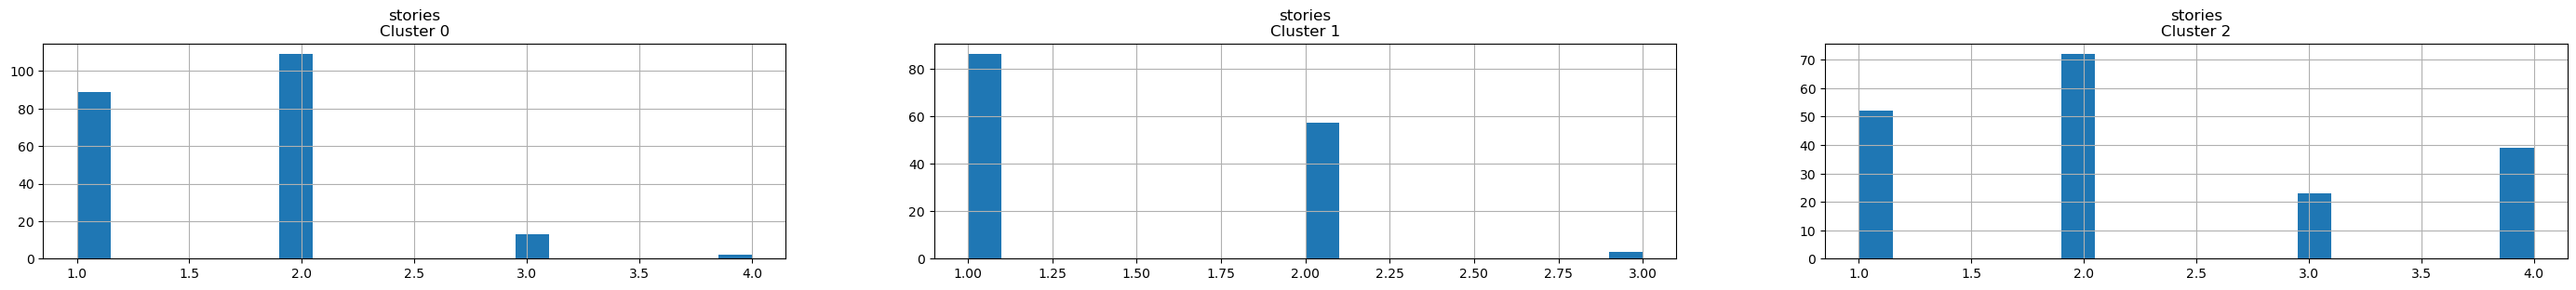

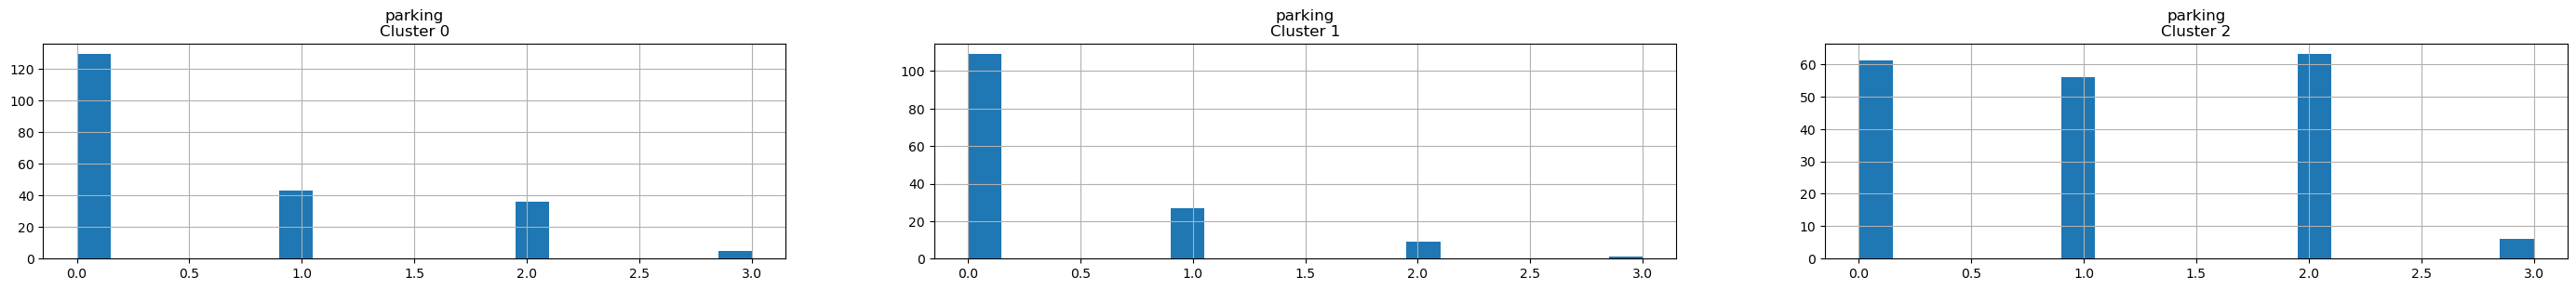

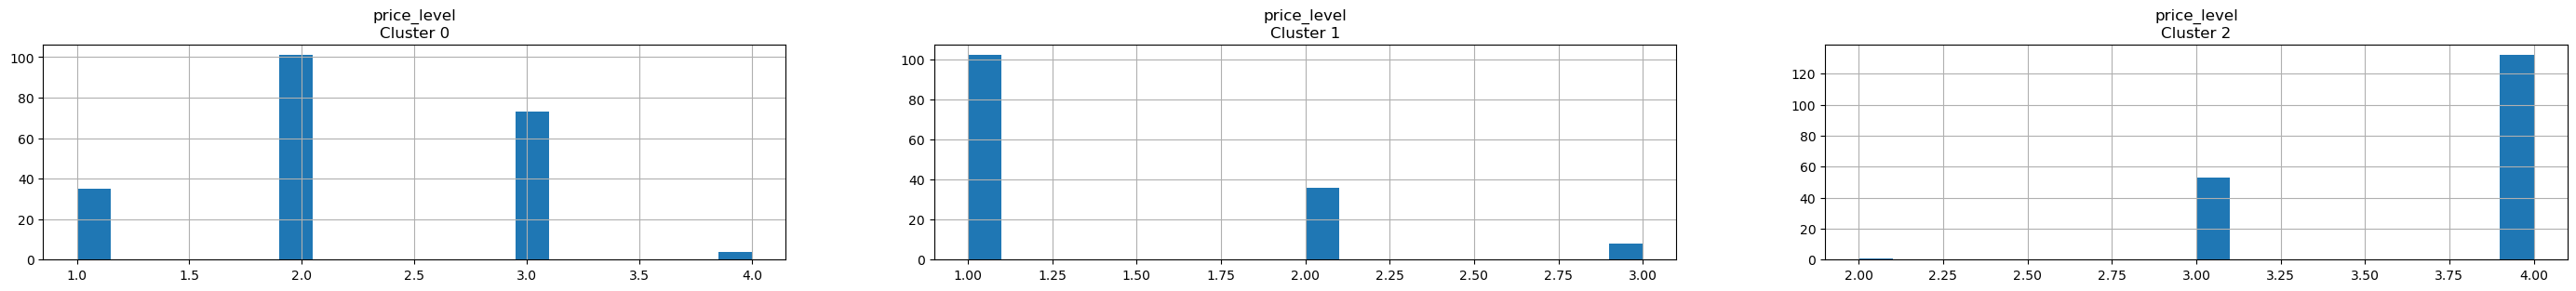

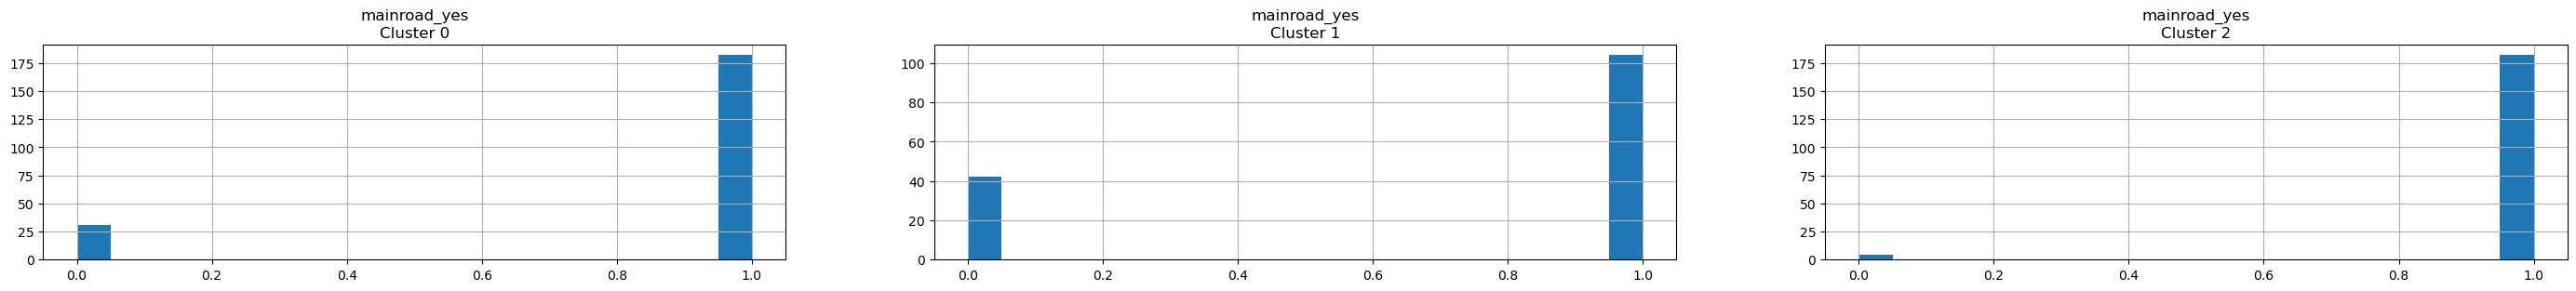

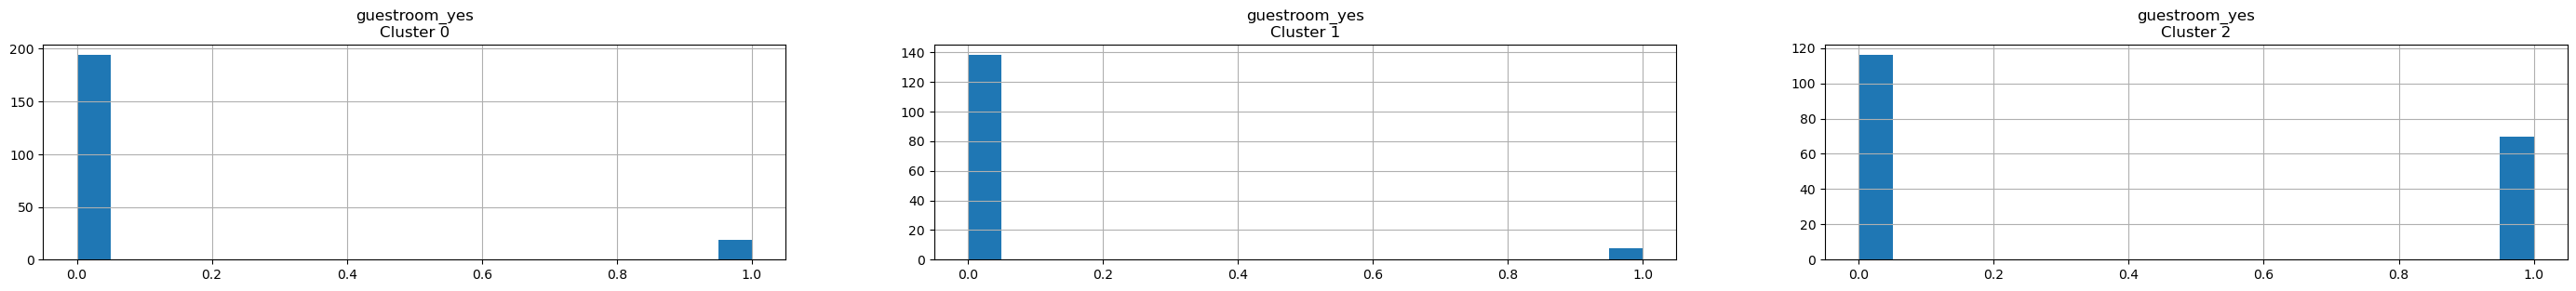

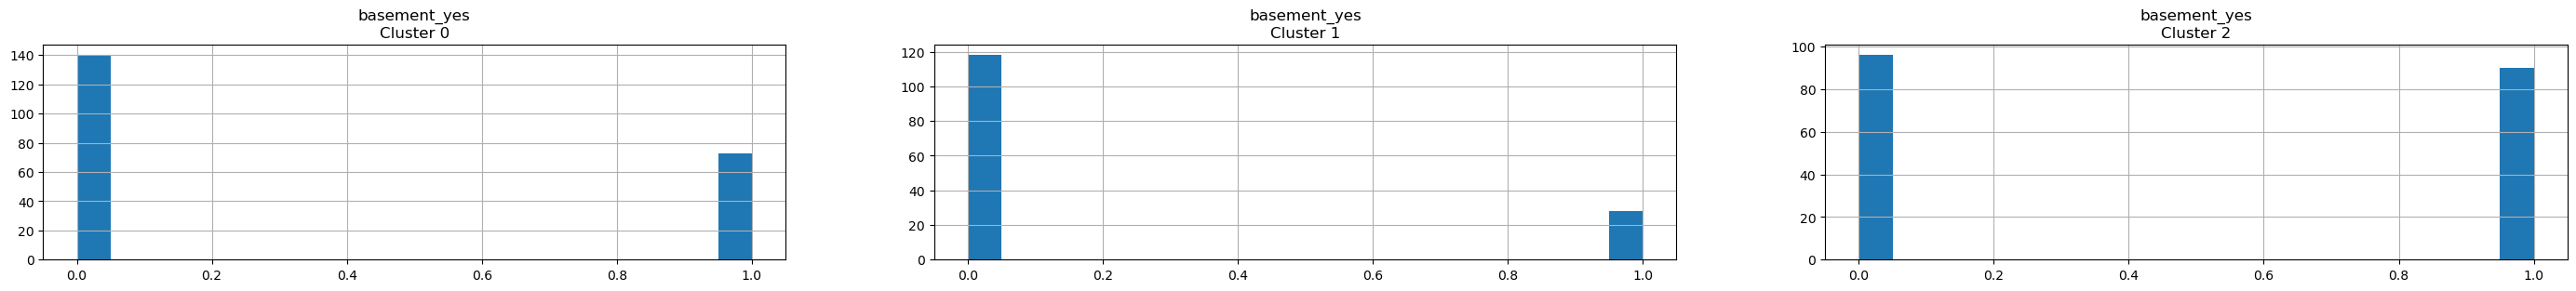

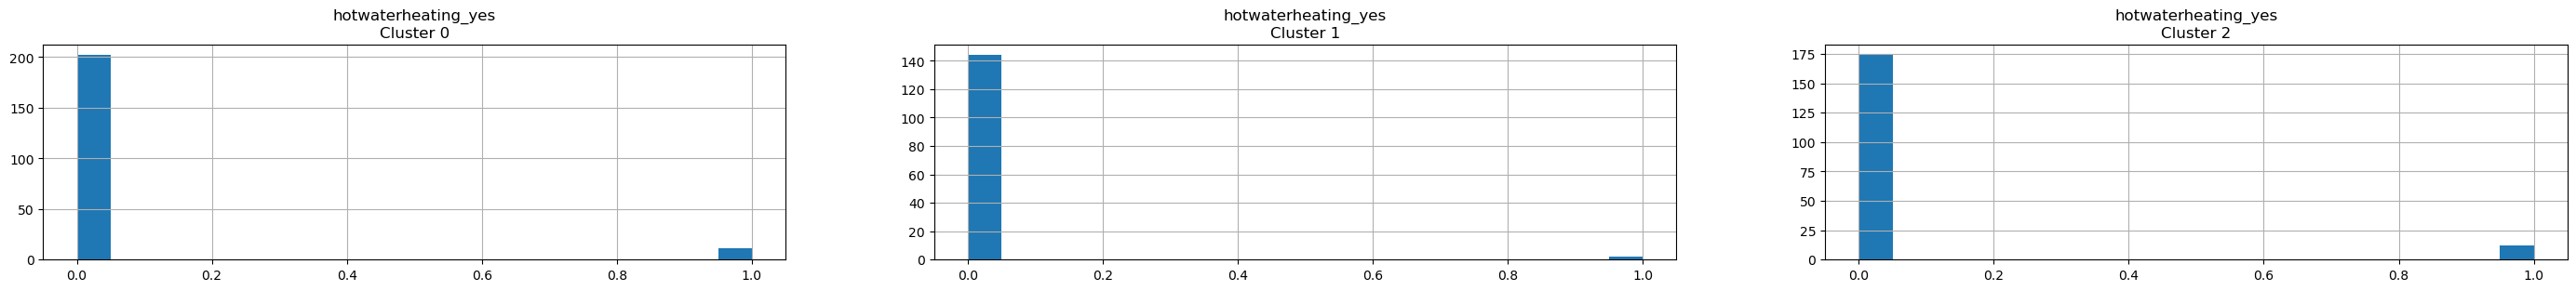

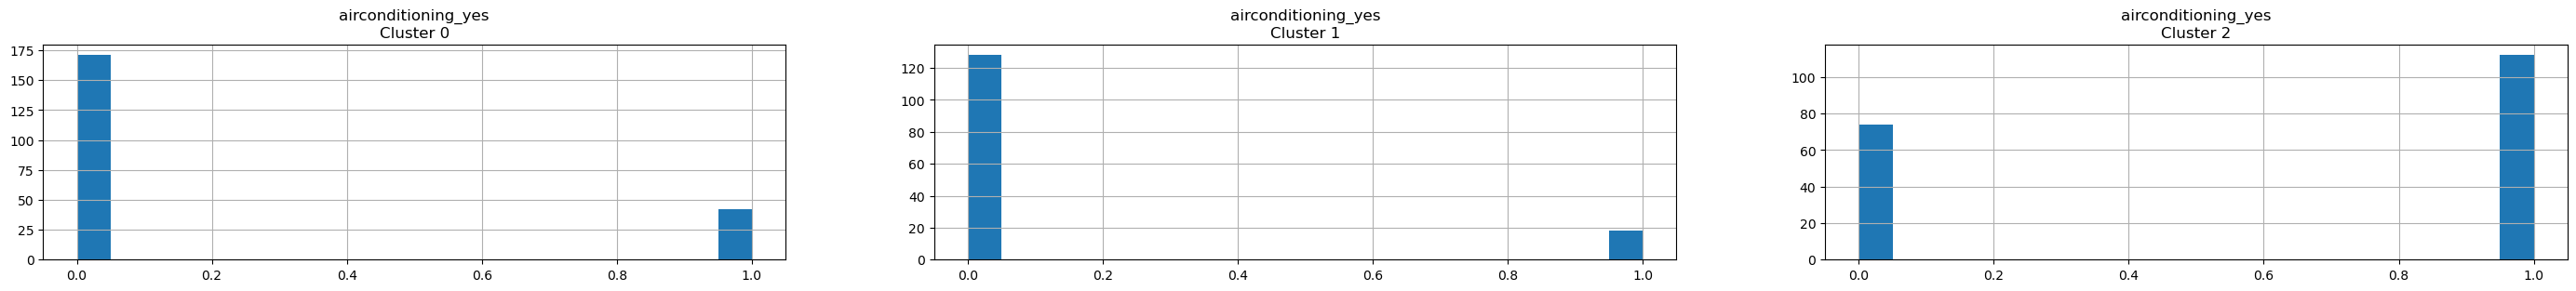

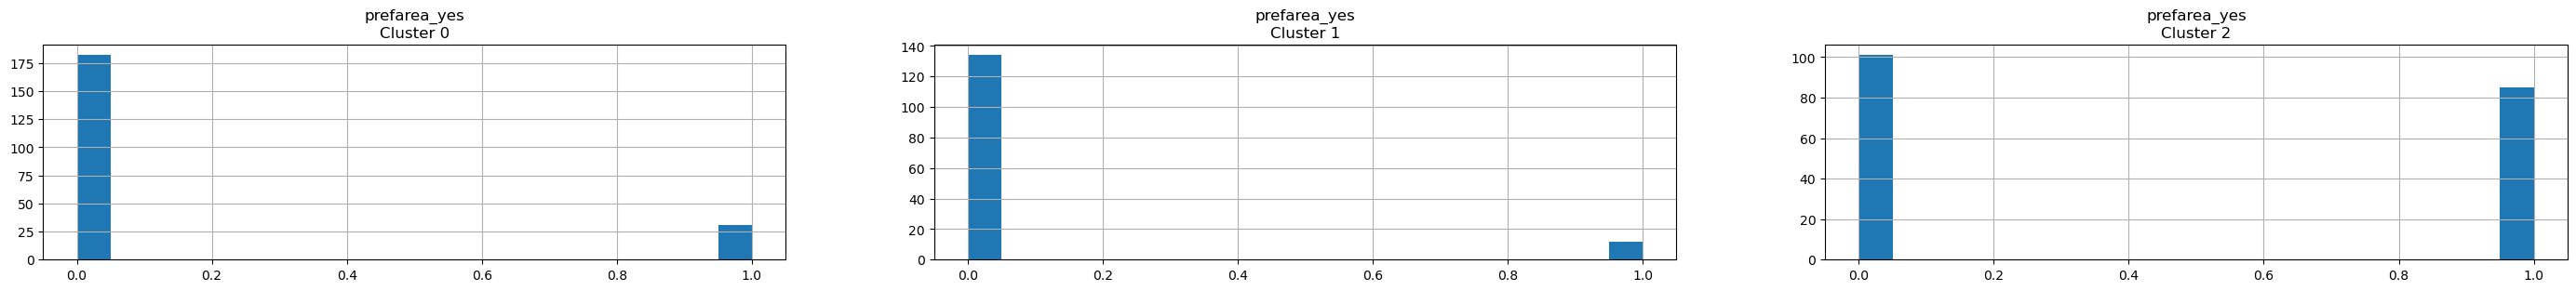

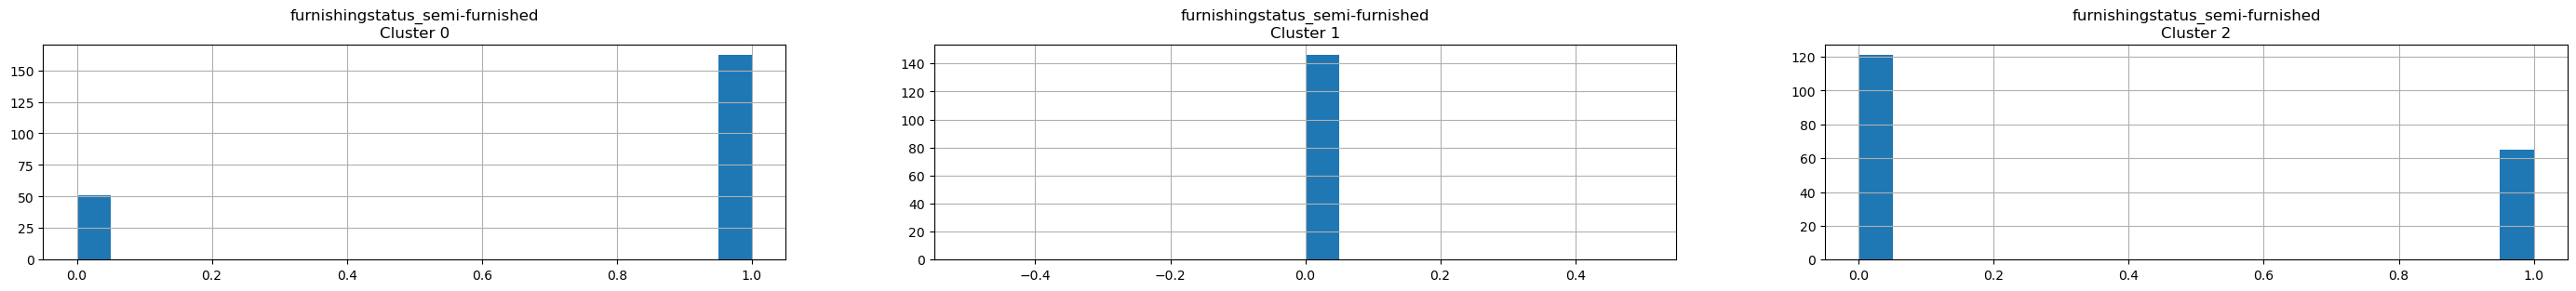

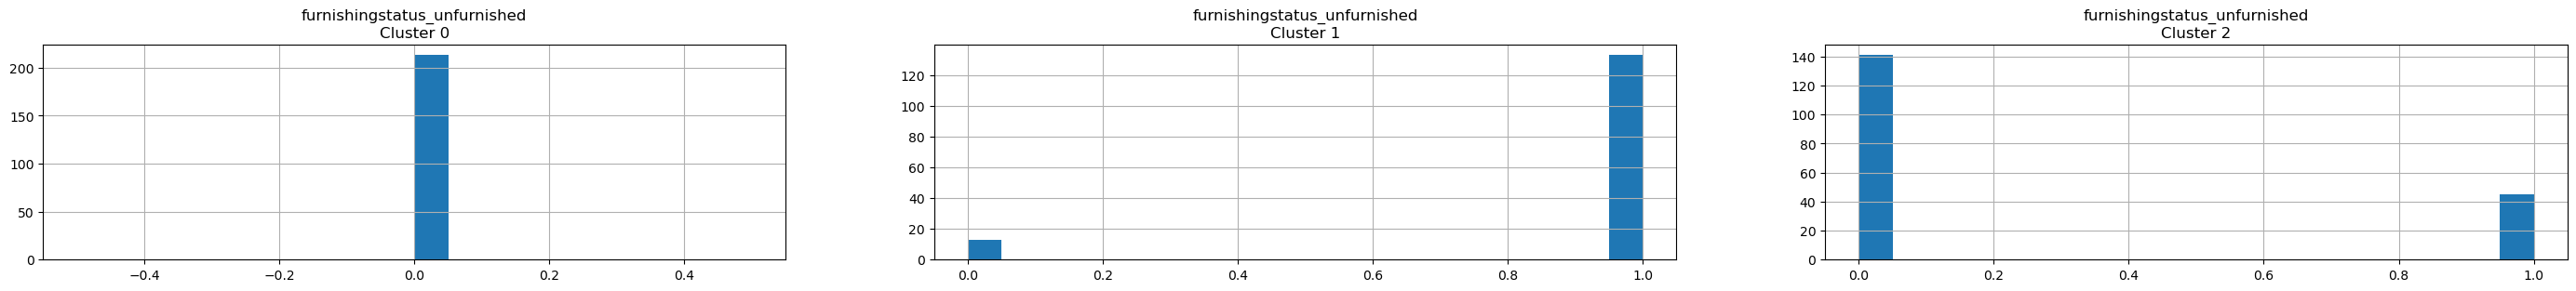

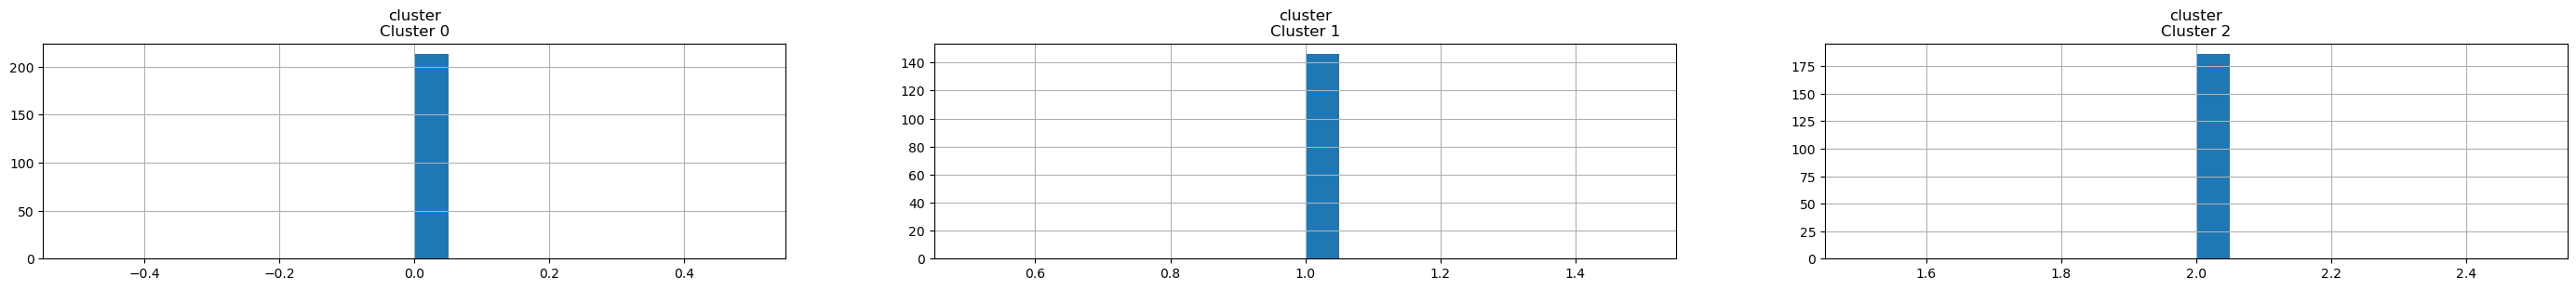

In [181]:
#--each row of figures represents feature distribution for each cluster-----#
for i in final_data_cluster.columns:
    plt.figure(figsize = (35, 3))
    for j in range(3):
        plt.subplot(1, 3, j+1)
        cluster = final_data_cluster[ final_data_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

In [182]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(final_data_scaled)
principal_comp

array([[ 3.81194422,  1.70266917],
       [ 5.15574521,  3.18199744],
       [ 3.48272333, -1.35665993],
       ...,
       [-3.25630913,  0.56460142],
       [-3.16181496,  0.06656914],
       [-2.63749886,  1.35219925]])

In [183]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\2513026182.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])


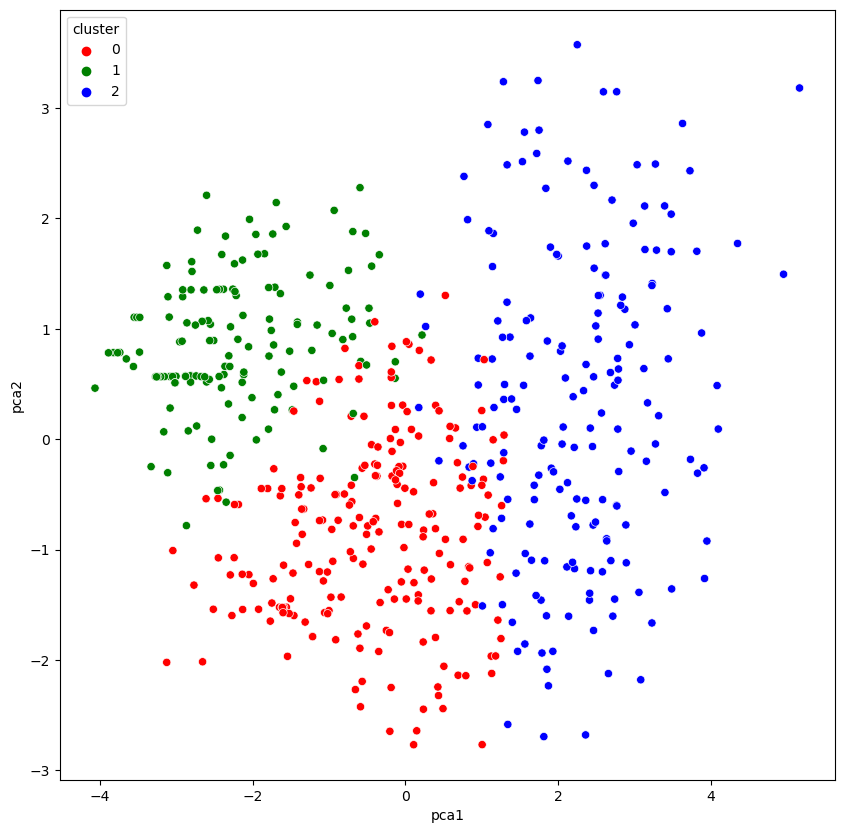

In [184]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])